# Avaliação 2 - Introdução à Ciência de Dados
## Análise do banco de dados "Police Violence & Racial Equity - Part 2 of 3"
### Felipe Lamarca e Guilherme Melo

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importando a base de dados:

In [18]:
dados = pd.read_csv(os.path.join('archive/crime_data/arrests_national_adults.csv'))
dados

# filtrando algumas colunas

dados = dados[["year", "offense_name", "population", "total_male", "total_female", "race_population", "white", "black", "asian_pacific_islander", "american_indian"]]
dados.head(8)

,year,offense_name,population,total_male,total_female,race_population,white,black,asian_pacific_islander,american_indian
0,2016,Arson,264534532,4509,1426,263887632,4263,1373,103,183
1,2016,Aggravated Assault,264534532,224176,67016,263887632,183478,94982,5365,6129
2,2016,Simple Assault,264534532,570193,213178,263887632,514297,237138,12418,14376
3,2016,Burglary,264534532,116213,28754,263887632,101778,39235,2035,1323
4,2016,Disorderly Conduct,264534532,180722,68577,263887632,161655,73552,2556,9460
5,2016,Drug Abuse Violations,264534532,920190,284712,263887632,844916,325859,14813,11743
6,2016,Drunkenness,264534532,242255,58979,263887632,228319,44180,3439,23967
7,2016,Drive Under the Influence,264534532,618382,209729,263887632,671271,114230,18819,14739


#### Ideias de gráfico

- Plot com número de brancos e pretos presos entre 1994-2016 em relação ao percentual da população
- Diferenças entre população carcerária masculina e feminina
- Fazer gráficos separados pra cada tipo de crime, desagregando para **homens e mulheres**
- Fazer gráficos separados pra cada tipo de crime, desagregando para **brancos e pretos** 

In [19]:
# número de negros presos, por ano

dados.groupby('year').black.sum()

year
1994    3092710
1995    3191658
1996    2892594
1997    3080481
1998    2960774
1999    2773637
2000    2777832
2001    2780997
2002    2439149
2003    2372335
2004    2389571
2005    2481451
2006    2520154
2007    2576509
2008    2592467
2009    2603987
2010    2510169
2011    2395931
2012    2419925
2013    2272474
2014    2198711
2015    2100742
2016    2116764
Name: black, dtype: int64

<AxesSubplot:title={'center':'Total de negros adultos presos entre 1994 e 2016'}, xlabel='year'>

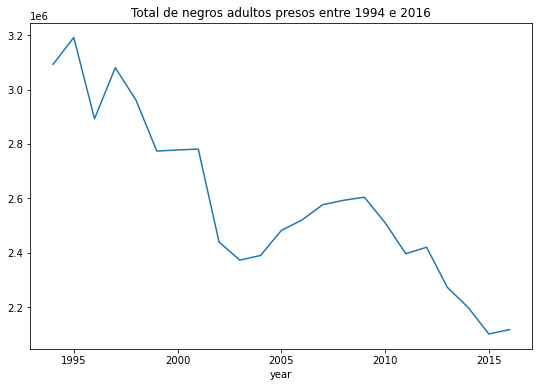

In [59]:
# Total de negros adultos (homens e mulheres) presos entre 1994 e 2016

dados.groupby('year').black.sum().plot(title = 'Total de negros adultos presos entre 1994 e 2016', figsize = (9,6))

In [21]:
# criando as colunas percentuais de mulheres e homens presos em relação à população total

def proporcao_homens(group):
    total_male = group.total_male.astype(float)
    population = group.population
    group['porcentagem_homens'] = total_male / population
    return group

def proporcao_mulheres(group):
    total_female = group.total_female.astype(float)
    population = group.population
    group['porcentagem_mulheres'] = total_female / population
    return group

dados = dados.groupby(['year']).apply(proporcao_mulheres)
dados = dados.groupby(['year']).apply(proporcao_homens)
dados.head()

,year,offense_name,population,total_male,total_female,race_population,white,black,asian_pacific_islander,american_indian,porcentagem_homens,porcentagem_mulheres
0,2016,Arson,264534532,4509,1426,263887632,4263,1373,103,183,0.000017,0.000005
1,2016,Aggravated Assault,264534532,224176,67016,263887632,183478,94982,5365,6129,0.000847,0.000253
2,2016,Simple Assault,264534532,570193,213178,263887632,514297,237138,12418,14376,0.002155,0.000806
3,2016,Burglary,264534532,116213,28754,263887632,101778,39235,2035,1323,0.000439,0.000109
4,2016,Disorderly Conduct,264534532,180722,68577,263887632,161655,73552,2556,9460,0.000683,0.000259


In [65]:
# tabela unindo os dados percentuais de gênero por ano (aqui, todos os percentuais de cada crime são somados)
dados_genero = dados.pivot_table(['porcentagem_homens', 'porcentagem_mulheres'], index = 'year')
dados_genero

,porcentagem_homens,porcentagem_mulheres
year,,
1994,0.001357,0.000315
1995,0.001372,0.000326
1996,0.001358,0.000330
1997,0.001387,0.000345
1998,0.001363,0.000342
1999,0.001299,0.000328
2000,0.001247,0.000317
2001,0.001188,0.000311
2002,0.001109,0.000310


<AxesSubplot:title={'center':'Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano'}, xlabel='year'>

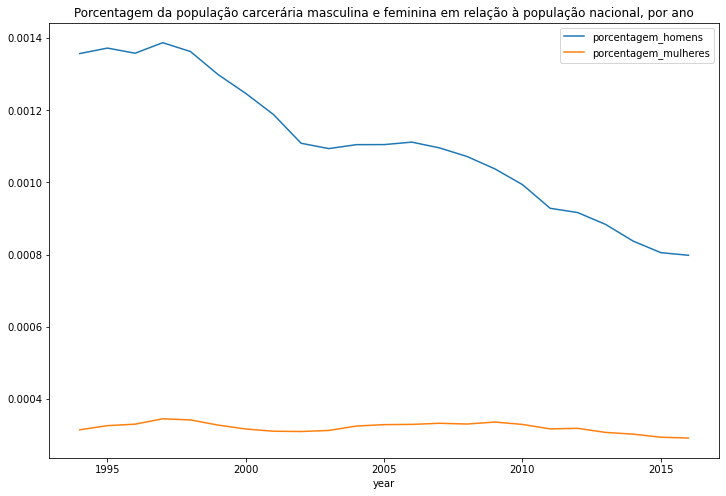

In [66]:
# plot do gráfico
dados_genero.plot(title = "Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano", figsize = (12,8))

In [71]:
def proporcao_black(group):
    black = group.black.astype(float)
    population = group.population
    group['porcentagem_black'] = black / population
    return group

def proporcao_white(group):
    white = group.white.astype(float)
    population = group.population
    group['porcentagem_white'] = white / population
    return group

dados = dados.groupby(['year']).apply(proporcao_black)
dados = dados.groupby(['year']).apply(proporcao_white)
dados.head()

,year,offense_name,population,total_male,total_female,race_population,white,black,asian_pacific_islander,american_indian,porcentagem_homens,porcentagem_mulheres,porcentagem_black,porcentagem_white
0,2016,Arson,264534532,4509,1426,263887632,4263,1373,103,183,0.000017,0.000005,0.000005,0.000016
1,2016,Aggravated Assault,264534532,224176,67016,263887632,183478,94982,5365,6129,0.000847,0.000253,0.000359,0.000694
2,2016,Simple Assault,264534532,570193,213178,263887632,514297,237138,12418,14376,0.002155,0.000806,0.000896,0.001944
3,2016,Burglary,264534532,116213,28754,263887632,101778,39235,2035,1323,0.000439,0.000109,0.000148,0.000385
4,2016,Disorderly Conduct,264534532,180722,68577,263887632,161655,73552,2556,9460,0.000683,0.000259,0.000278,0.000611


In [72]:
# pretos, brancos, asiáticos e ameríndios (aqui, todos os percentuais de cada crime são somados)
dados_raca = dados.pivot_table(['porcentagem_white', 'porcentagem_black'], index = 'year')
dados_raca

,porcentagem_black,porcentagem_white
year,,
1994,0.000531,0.001104
1995,0.000551,0.001108
1996,0.000527,0.001118
1997,0.000564,0.001125
1998,0.000543,0.001114
1999,0.000507,0.001076
2000,0.000485,0.001036
2001,0.000461,0.001002
2002,0.000396,0.000986


<AxesSubplot:title={'center':'Porcentagem da população carcerária dividida por raça a cada ano'}, xlabel='year'>

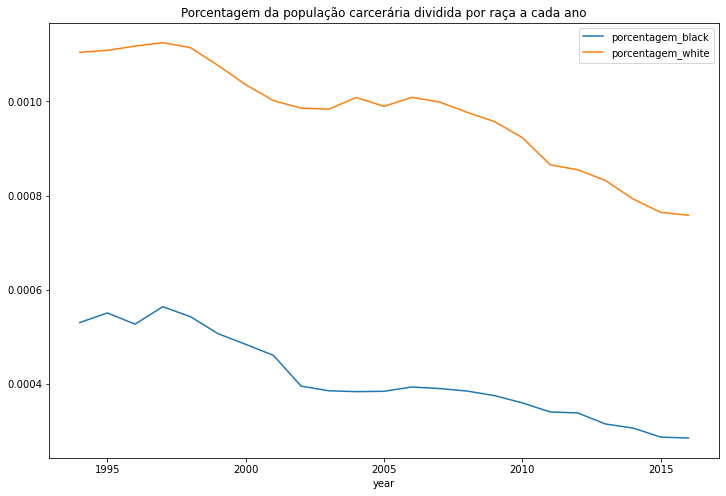

In [73]:
dados_raca.plot(title = "Porcentagem da população carcerária dividida por raça a cada ano", figsize = (12,8))

In [75]:
# Gráfico sem porcentagens e adicionando outras classificações de raça

dados_raca_2 = dados.pivot_table(['white', 'black', 'asian_pacific_islander', 'american_indian'], index = 'year')
dados_raca_2.head()

,american_indian,asian_pacific_islander,black,white
year,,,,
1994,3710.107143,3045.357143,110453.928571,229805.357143
1995,3813.428571,3276.857143,113987.785714,229191.321429
1996,4210.285714,3319.571429,103306.928571,218889.107143
1997,4053.214286,3374.500000,110017.178571,219218.357143
1998,3841.821429,3573.214286,105741.928571,216877.071429


<AxesSubplot:title={'center':'Linha temporal da população carcerária, por raça'}, xlabel='year'>

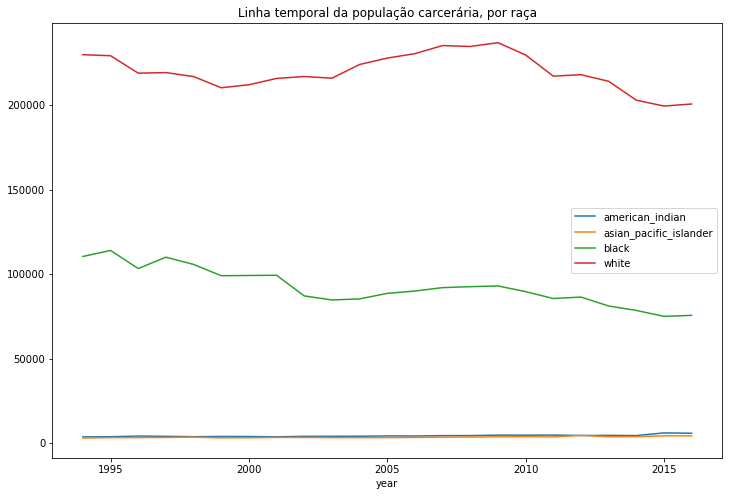

In [76]:
# num primeiro momento parece contraintuitivo que tenha o dobro de brancos na cadeia em comparação a pretos,
# mas atualmente pretos compõem 13% da população total dos EUA hoje. Ou seja, se a gente considerar a subdivisão
# da população por raça (a base não traz esse dado), o percentual dos pretos vai ser muuuito maior

dados_raca_2.plot(title = "Linha temporal da população carcerária, por raça", figsize = (12,8))